<b>Подгрузите датасет, отобразите структурную информацию, дайте комментарии по датасету</b>

In [1]:
# импорт нужных библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from catboost import CatBoostRegressor
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.shape, df_test.shape

((12870, 17), (4291, 16))

In [3]:
df = pd.concat([df_train.drop('y', axis=1), df_test], axis=0)
df.reset_index(inplace=True, drop=True)
df.shape

(17161, 16)

In [4]:
df.info()   # узнаем тип значений всех колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17161 entries, 0 to 17160
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         17161 non-null  int64  
 1   age        16573 non-null  float64
 2   job        17161 non-null  object 
 3   marital    17161 non-null  object 
 4   education  17161 non-null  object 
 5   default    17161 non-null  object 
 6   balance    17156 non-null  float64
 7   housing    17161 non-null  object 
 8   loan       17161 non-null  object 
 9   contact    17161 non-null  object 
 10  day        17161 non-null  int64  
 11  month      17156 non-null  object 
 12  campaign   17161 non-null  int64  
 13  pdays      17161 non-null  int64  
 14  previous   17161 non-null  int64  
 15  poutcome   17161 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)   # узнаем есть ли пустые значения

age          588
balance        5
month          5
ID             0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
day            0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [6]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,13829,NaN,technician,single,tertiary,no,NaN,no,no,cellular,11,NaN,2,-1,0,unknown
1,22677,NaN,services,single,secondary,no,NaN,yes,yes,unknown,5,NaN,3,-1,0,unknown
2,10541,NaN,management,single,secondary,no,NaN,no,no,cellular,14,NaN,2,-1,0,unknown
3,13689,NaN,technician,married,unknown,no,NaN,yes,no,cellular,10,NaN,1,-1,0,unknown
4,11304,NaN,admin.,single,secondary,no,NaN,no,yes,unknown,2,NaN,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17156,50332,47.0,admin.,married,secondary,no,520.0,no,no,telephone,9,feb,6,-1,0,unknown
17157,51293,33.0,technician,married,secondary,no,133.0,no,no,cellular,12,nov,2,192,1,success
17158,54023,40.0,admin.,married,secondary,no,2574.0,yes,no,cellular,20,nov,1,-1,0,unknown
17159,53775,39.0,blue-collar,married,secondary,no,2467.0,no,no,cellular,19,jul,2,276,3,other


> Полный датасет имеет размерность 17161х16;   7 числовых и 10 категориальных фичей;   пустые значения есть в колонках: 'age','balance','month'

## Визуализация

* <b>Какие виды/подвиды типов данных используются в машинном обучении?</b>  
    * Числовые (дискретные, непрерывные) 
    * Категориальные (порядковые, номинальные)       

    * Текстовые данные
    * Изображения
    * Аудио данные
    * Видео данные
    * Геоданные
    * Временные ряды
    * Графы и сети


* <b>С помощью чего можно отобразить распределение каждого из признаков?</b>

> Для отображения распределения каждого из признаков можно использовать гистограмму, ящик с усами (boxplot), плотность распределения (density plot) или комбинацию этих методов с помощью библиотеки seaborn.

* <b>Создайте переменные <i>numeric_features, categorical_features</i>, в которые запишите название столбцов числовых и категориальных признаков</b>
* <b>Отобразите распределения всех признаков</b> (можно в одной фигуре все числовые, в другой все категориальные)
* <b>Отобразите основные зависимости</b> (начать с матрицы корреляций и вывести зависимости таргета с самыми значимыми)

In [7]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

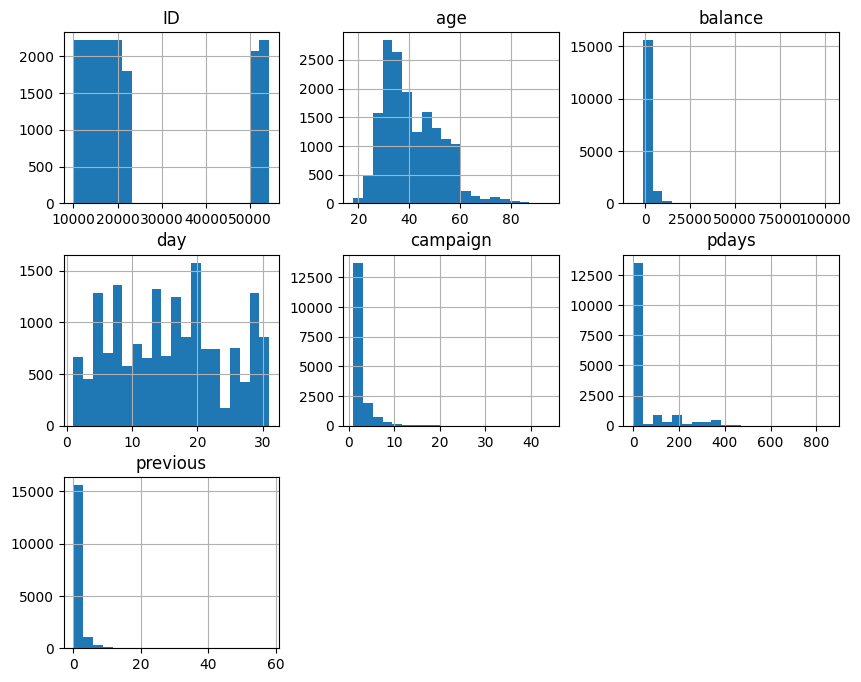

In [8]:
# Для отображения распределений числовых признаков можно использовать функцию hist из библиотеки matplotlib:

df[numeric_features].hist(bins=20, figsize=(10,8))
plt.show()

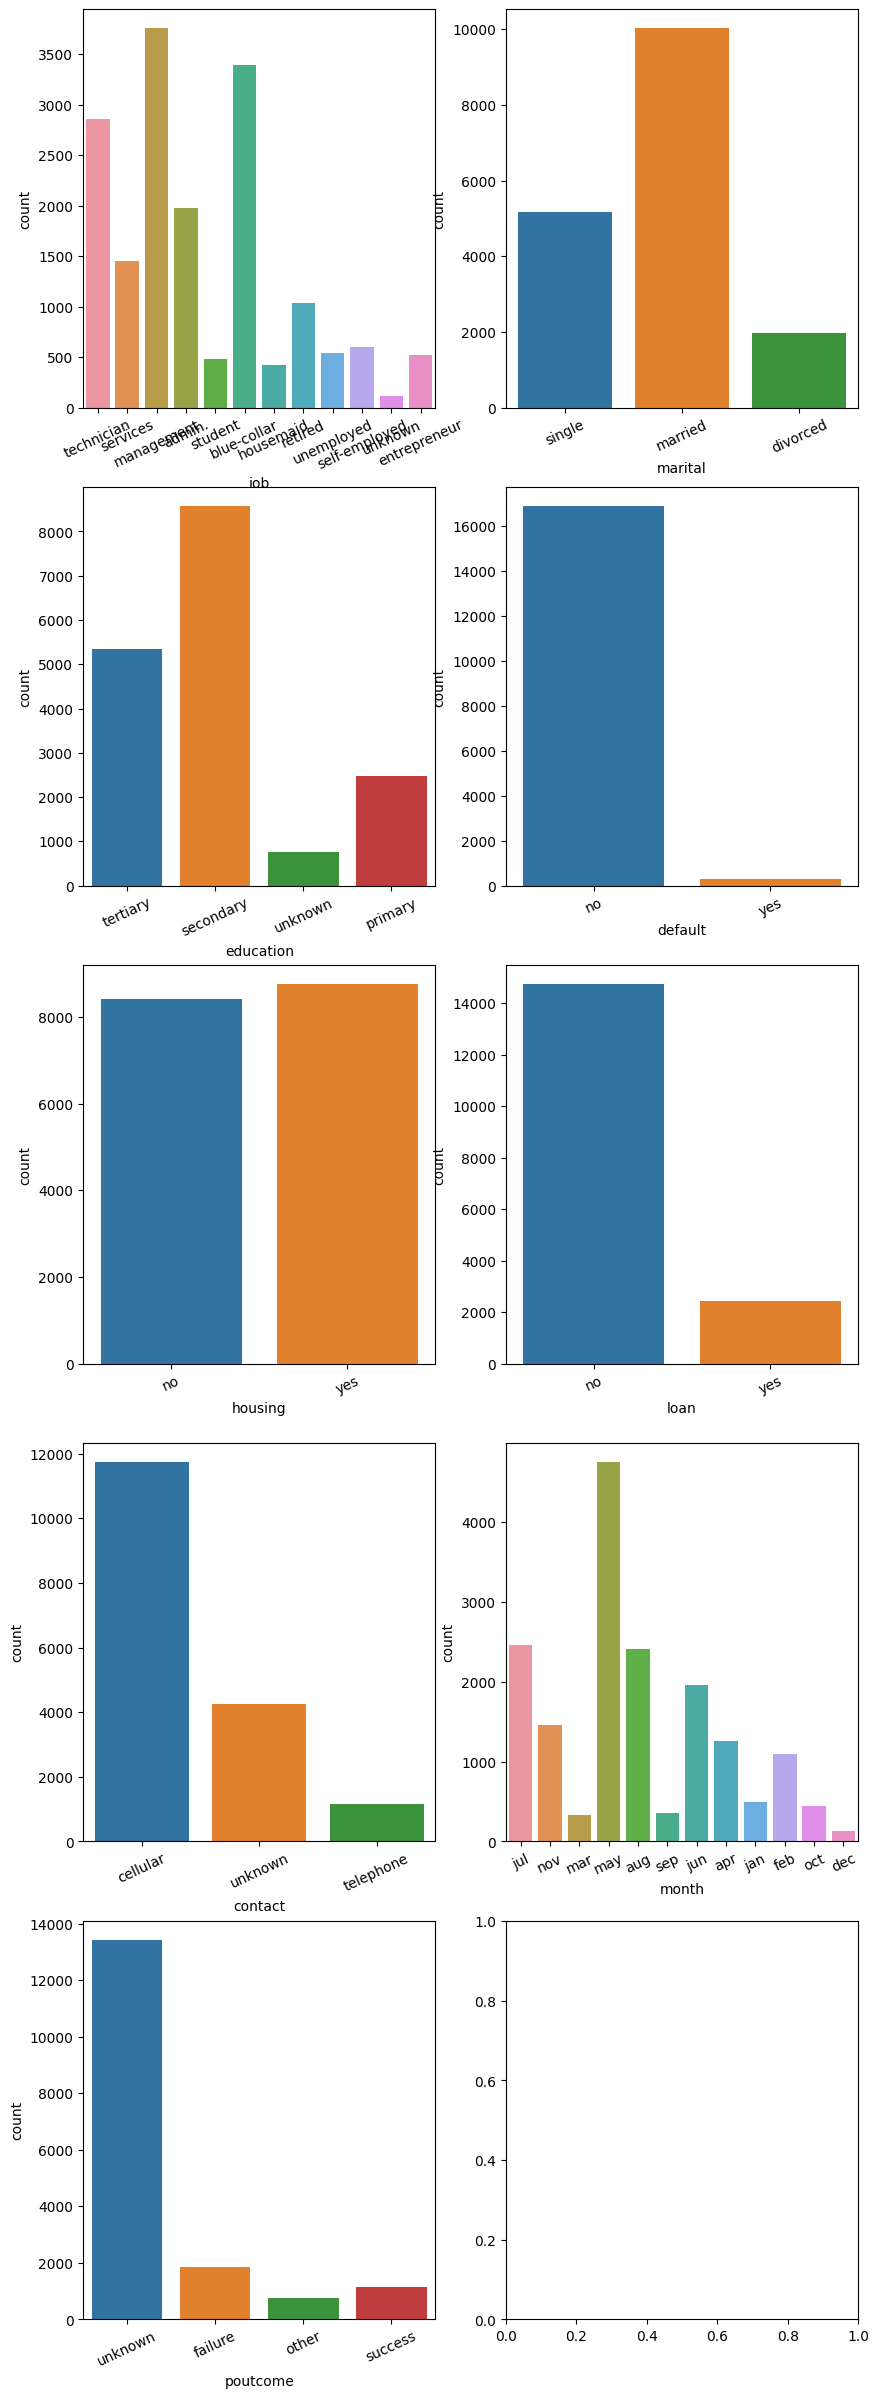

In [9]:
# Для отображения распределений категориальных признаков можно использовать функцию countplot из библиотеки seaborn:

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,30))
axes = ax.reshape(-1) # превращаем двумерный массив в одномерный
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25) # поворачиваем названия по оси x на 90 градусов  
plt.show()

> Матрица корреляций работает только с числовыми данными, а в данных есть категориальные признаки. Поэтому необходимо предварительно обработать данные и преобразовать категориальные признаки в числовые. Сделала ниже, после scaling

## Работа с пропусками  

* <b>какими способами можно обработать пропуски:</b>
    - в категориальных переменных
      > - Заполнение наиболее частым значением (mode)
      > - Создание новой категории "unknown" и заполнение ею пропусков
      > - Использование модели машинного обучения для заполнения пропусков на основе других признаков
    - в числовых переменных
      > - Заполнение средним или медианным значением
      > - Использование модели машинного обучения для заполнения пропусков на основе других признаков

    
* <b>Какие плюсы у того или иного способа</b>

  > - Плюсы заполнения наиболее частым значением: простота и быстрота выполнения, сохранение общей структуры данных.
  > - Плюсы создания новой категории "unknown": сохранение информации о пропущенных значениях, возможность использования этой информации в дальнейшем анализе.
  > - Плюсы использования модели машинного обучения: более точное заполнение пропусков, учет зависимостей между признаками.
  
  > - Плюсы заполнения средним или медианным значением: простота и быстрота выполнения, сохранение общей структуры данных.
  > - Плюсы использования модели машинного обучения: более точное заполнение пропусков, учет зависимостей между признаками.

* <b>Заполните пропуски способом, который считаете нужным</b>

In [10]:
df['age'] = df['age'].fillna(df['age'].mean())
df['balance'] = df['balance'].fillna(df['balance'].mean())
df['month'] = df['month'].fillna(df['month'].mode()[0])

## Статистика



* <b>Что такое t-test/z-test и для чего он применяется?</b>

> T-тест и Z-тест - это статистические тесты, которые используются для проверки гипотез о параметрах совокупности на основе выборочных данных.
> - T-тест используется, когда мы имеем маленький объем выборки (обычно менее 30) и не знаем дисперсию совокупности. Он позволяет нам определить, является ли различие между двумя выборочными средними статистически значимым или случайным.
> - Z-тест используется, когда мы имеем большой объем выборки (обычно более 30) и знаем дисперсию совокупности. Он также позволяет нам определить, является ли различие между двумя выборочными средними статистически значимым или случайным.

* <b>Примените t-test для проверки значимости признака `balance` в разрезе класса</b> и прокомментируйте поулученный результат

> комментарий по результатам теста

## Кодирование категориальных переменных

* <b>Для чего нужно кодировать категориальные переменные?</b>
    > Кодирование категориальных переменных необходимо для того, чтобы использовать их в анализе данных и моделировании. Категориальные переменные не могут быть использованы в их исходном виде, поскольку они не являются числовыми значениями, которые могут быть обработаны алгоритмами машинного обучения.
* <b>Какие способы кодирования категориальных переменных вам известно</b>
    > - One-Hot Encoding: каждая категория преобразуется в отдельный бинарный признак, который может принимать значение 0 или 1.
    > - Ordinal Encoding: каждой категории присваивается уникальное числовое значение в порядке возрастания или убывания.
    > - Label Encoding: каждой категории присваивается уникальное числовое значение без учета порядка.

* <b>Закодируйте переменные соответствующим способом</b>

In [11]:
y = df_train['y']

# Создаем объект LabelEncoder
le = LabelEncoder()

# Применяем Label Encoding к целевой переменной
y_encoded = le.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
X = df

# Применяем Label Encoding к каждому категориальному признаку
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,13829,41.044048,9,2,2,0,1480.659594,0,0,0,11,8,2,-1,0,3
1,22677,41.044048,7,2,1,0,1480.659594,1,1,2,5,8,3,-1,0,3
2,10541,41.044048,4,2,1,0,1480.659594,0,0,0,14,8,2,-1,0,3
3,13689,41.044048,9,1,3,0,1480.659594,1,0,0,10,8,1,-1,0,3
4,11304,41.044048,0,2,1,0,1480.659594,0,1,2,2,8,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17156,50332,47.000000,0,1,1,0,520.000000,0,0,1,9,3,6,-1,0,3
17157,51293,33.000000,9,1,1,0,133.000000,0,0,0,12,9,2,192,1,2
17158,54023,40.000000,0,1,1,0,2574.000000,1,0,0,20,9,1,-1,0,3
17159,53775,39.000000,1,1,1,0,2467.000000,0,0,0,19,5,2,276,3,1


## Scaling

* <b>Какие основные Scaler'ы знаете</b>
    > - StandardScaler: масштабирует данные таким образом, чтобы среднее значение было равно 0, а стандартное отклонение - 1.
    > - MinMaxScaler: масштабирует данные таким образом, чтобы все значения находились в интервале от 0 до 1.
    > - RobustScaler: масштабирует данные таким образом, чтобы они были устойчивы к выбросам.
* <b>Для чего это нужно</b>
    > Scaler'ы используются для нормализации данных перед их использованием в алгоритмах машинного обучения. Это позволяет улучшить производительность модели и сделать ее более устойчивой к выбросам.

In [13]:
ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df.loc[:, df.columns != 'ID']), columns=df.columns[1:])
df_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,0.000000,1.403683,1.316895,0.987864,-0.130878,6.971822e-17,-1.020667,-0.406151,-0.654940,-0.560481,0.814363,-0.226470,-0.448013,-0.339641,0.481673
1,0.000000,0.790109,1.316895,-0.339472,-0.130878,6.971822e-17,0.979752,2.462141,1.667735,-1.278104,0.814363,0.123377,-0.448013,-0.339641,0.481673
2,0.000000,-0.130252,1.316895,-0.339472,-0.130878,6.971822e-17,-1.020667,-0.406151,-0.654940,-0.201670,0.814363,-0.226470,-0.448013,-0.339641,0.481673
3,0.000000,1.403683,-0.303470,2.315200,-0.130878,6.971822e-17,0.979752,-0.406151,-0.654940,-0.680085,0.814363,-0.576318,-0.448013,-0.339641,0.481673
4,0.000000,-1.357399,1.316895,-0.339472,-0.130878,6.971822e-17,-1.020667,2.462141,1.667735,-1.636915,0.814363,-0.576318,-0.448013,-0.339641,0.481673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17156,0.535802,-1.357399,-0.303470,-0.339472,-0.130878,-2.945613e-01,-1.020667,-0.406151,0.506398,-0.799689,-0.793618,1.172921,-0.448013,-0.339641,0.481673
17157,-0.723649,1.403683,-0.303470,-0.339472,-0.130878,-4.132247e-01,-1.020667,-0.406151,-0.654940,-0.440877,1.135959,-0.226470,1.401696,0.149703,-0.526866
17158,-0.093923,-1.357399,-0.303470,-0.339472,-0.130878,3.352444e-01,0.979752,-0.406151,-0.654940,0.515953,1.135959,-0.576318,-0.448013,-0.339641,0.481673
17159,-0.183884,-1.050612,-0.303470,-0.339472,-0.130878,3.024356e-01,-1.020667,-0.406151,-0.654940,0.396349,-0.150426,-0.226470,2.206751,1.128393,-1.535405


* <b>Отобразите боксплоты, отмасштабируйте свои признаки</b>

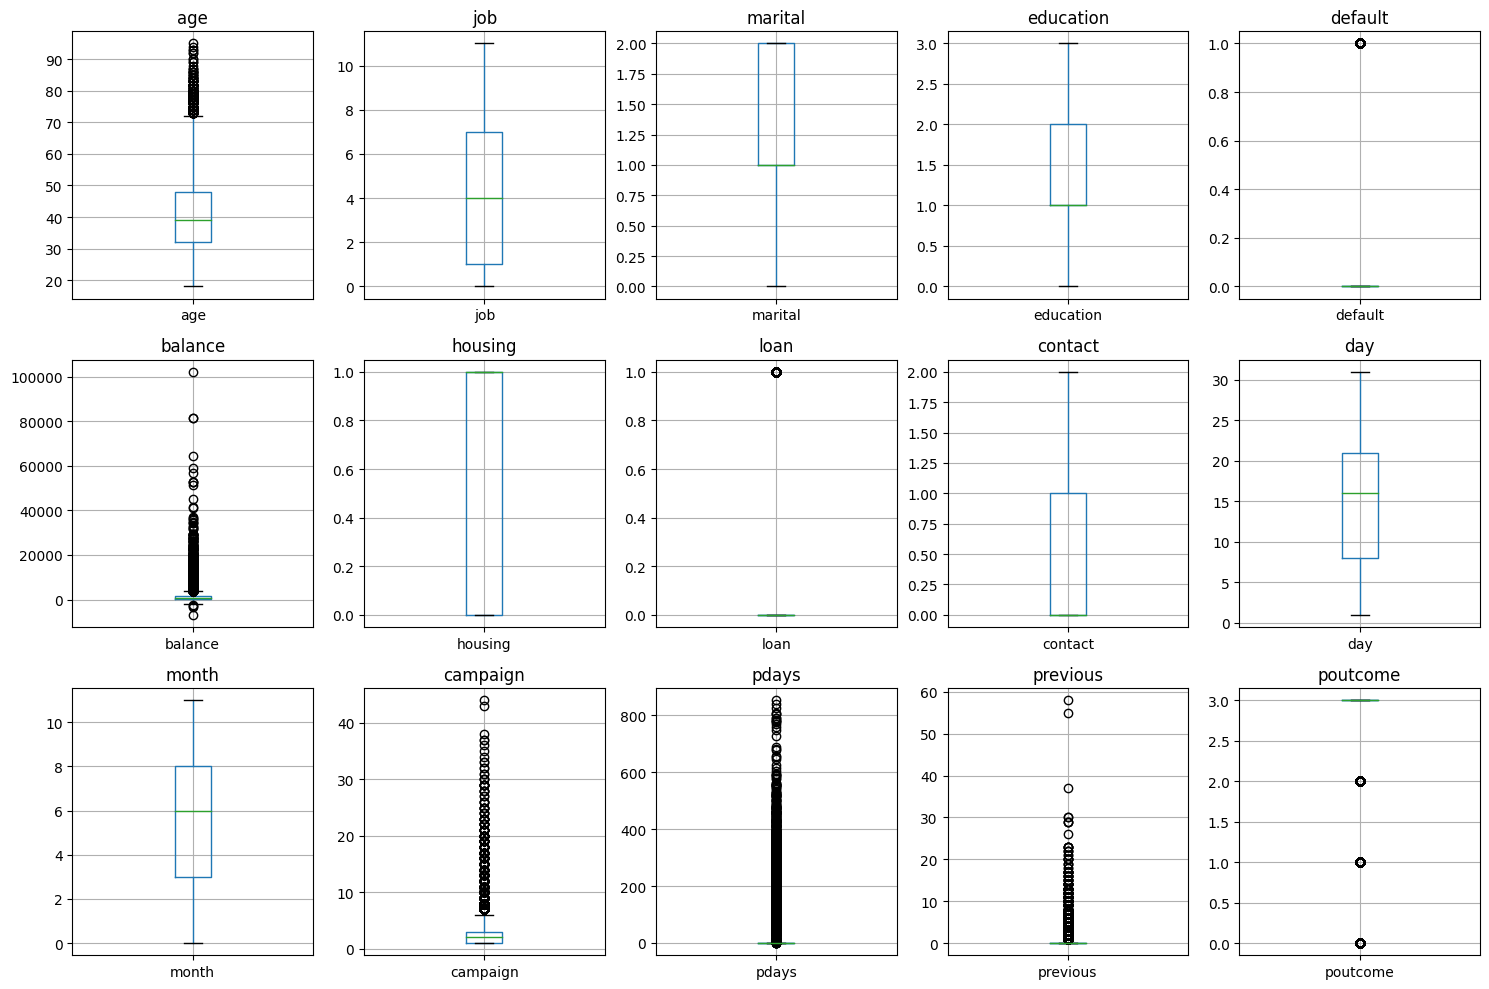

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))

for i, feature in enumerate(df_scaled):
    row = i // 5
    col = i % 5
    X.boxplot(column=feature, ax=axes[row,col])
    axes[row,col].set_title(feature)

plt.tight_layout()

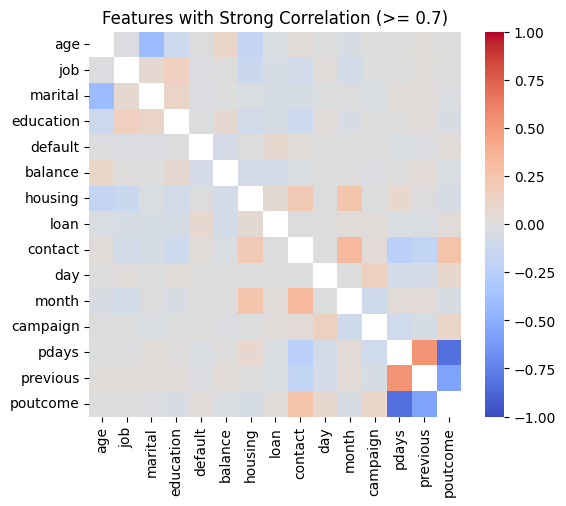

In [27]:
corr_matrix = df_scaled.corr()

# Filter the correlation matrix based on a threshold, e.g., 0.7
threshold = 0
strong_corr = corr_matrix[(np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) != 1)]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(strong_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Features with Strong Correlation (>= 0.7)")
plt.show()

# Классификация

Решите задачу классификации для переменной `y` и сформируйте файл для `submission`. Не забывай, что твоя первая модель `baseline` - должна быть самой простой с точки зрения предобработки и настройки.

❗️ Столбец с предсказаниями в файле `submission.csv` должен называться `predict`. Если он будет называться иначе, файл не пройдет валидацию. \
❗️ Обратите внимание, что `ID` в файле `test.csv` и `submission.csv` совпадают. Решить задачу нужно для каждого конкретного `ID`.  

In [ ]:
import pandas as pd

assert len(pd.read_csv('data/test.csv')) == len(pd.read_csv('data/submission.csv')), \
    'Lengths of files are mismatch!'

In [16]:
# Разбиваем наш df на train and test

df_train = df_scaled.loc[0:12869,:] 
df_test = pd.concat([df['ID'][12870:], df_scaled.loc[12870:,:]], axis=1)
df_train.shape, df_test.shape

((12870, 15), (4291, 16))

In [17]:
x = df_train
x_train, x_valid, y_train, y_valid = train_test_split(x, y_encoded, test_size=0.25, random_state=42)
x_train.shape,  y_train.shape, x_valid.shape, y_valid.shape

((9652, 15), (9652,), (3218, 15), (3218,))

> Некоторые модели, которые позволяют использовать метод predict_proba для оценки вероятностей принадлежности к классам:

1. Логистическая регрессия
2. Метод опорных векторов (SVM)
3. Градиентный бустинг (Gradient Boosting)
4. Случайный лес (Random Forest)
5. Наивный Байесовский классификатор (Naive Bayes Classifier)
6. k-ближайших соседей (k-Nearest Neighbors)
7. Многоклассовый персептрон (Multiclass Perceptron)
8. Многослойный персептрон (Multilayer Perceptron)

In [ ]:
#   from sklearn.linear_model import LogisticRegression
#   
#   # создание объекта логистической регрессии
#   logreg = LogisticRegression()
#   
#   # обучение модели на обучающей выборке
#   logreg.fit(x_train, y_train)
#   
#   # оценка качества модели на тестовой выборке
#   score = logreg.score(x_valid, y_valid)
#   score = 0.7334887334887334

In [ ]:
#   from sklearn.svm import SVC
#   
#   # создание объекта SVM
#   svm = SVC()
#   
#   # обучение модели на обучающей выборке
#   svm.fit(x_train, y_train)
#   
#   # оценка качества модели на тестовой выборке
#   score = svm.score(x_valid, y_valid)
#   score = 0.7668997668997669

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# создание объекта градиентного бустинга
gb = GradientBoostingClassifier()

# обучение модели на обучающей выборке
gb.fit(x_train, y_train)

# оценка качества модели на тестовой выборке
score = gb.score(x_valid, y_valid)
score

0.7939714108141703

In [ ]:
#   from sklearn.ensemble import RandomForestClassifier
#   
#   # создание объекта случайного леса
#   rf = RandomForestClassifier()
#   
#   # обучение модели на обучающей выборке
#   rf.fit(x_train, y_train)
#   
#   # оценка качества модели на тестовой выборке
#   score = rf.score(x_valid, y_valid)
#   score = 0.7808857808857809

In [21]:
#   from sklearn.neighbors import KNeighborsClassifier
#   
#   # создание и обучение модели k-ближайших соседей
#   knn = KNeighborsClassifier(n_neighbors=5)
#   knn.fit(x_train, y_train)
#   # оценка качества модели на тестовой выборке
#   score = knn.score(x_valid, y_valid)
#   score = 0.7352392790553138

In [23]:
from sklearn.metrics import roc_auc_score
y_pred = gb.predict(x_valid)
roc_auc = roc_auc_score(y_valid, y_pred)
roc_auc

0.6951328044328305

In [24]:
y_pred_test = gb.predict_proba(df_test.drop(['ID'], axis=1))[:,1]
y_pred_test.round(1)

array([0.9, 0.7, 0.1, ..., 0.2, 0.5, 0.1])

In [ ]:
# сохранение submission файла
#submission_gb = pd.DataFrame({'ID':df_test['ID'], 'predict': y_pred_test})
#submission_gb.to_csv('/home/viktoria/ml-assessment/submission_gb.csv', index=False)

In [26]:
# сохранение submission файла
submission_gb = pd.DataFrame({'ID':df_test['ID'], 'predict': y_pred_test})
submission_gb.to_csv('/home/viktoria/ml-assessment/submission_gb.csv', index=False)

# Последний результат

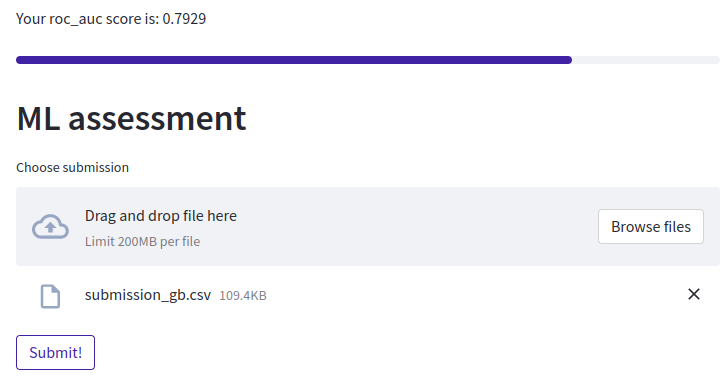

In [29]:
from IPython.display import Image

Image(filename='/home/viktoria/Изображения/Снимки экрана/Снимок экрана от 2023-05-19 15-20-53.png')